In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/Advertising.csv")

In [ ]:
df.shape

(200, 5)

In [ ]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [ ]:
df.drop(columns='Unnamed: 0',axis=1,inplace=True)

In [ ]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [ ]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


<Axes: >

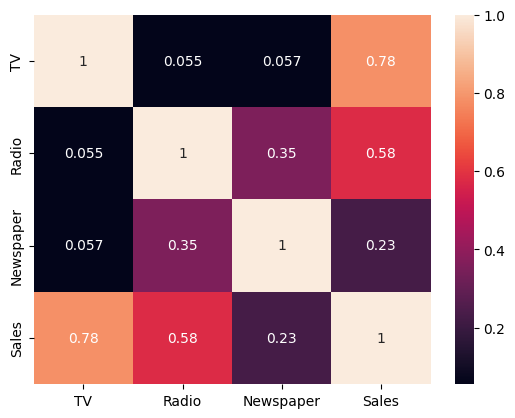

In [ ]:
sns.heatmap(df.corr(),annot=True)

Scatter plots

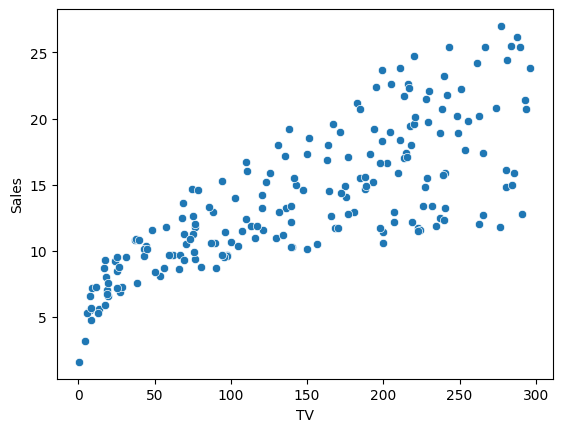

In [ ]:
sns.scatterplot(data=df,x='TV',y='Sales')
plt.show()

There is a linear relationship

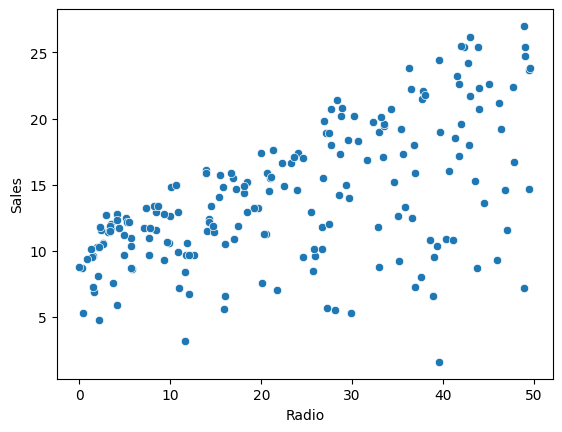

In [ ]:
sns.scatterplot(data=df,x='Radio',y='Sales')
plt.show()

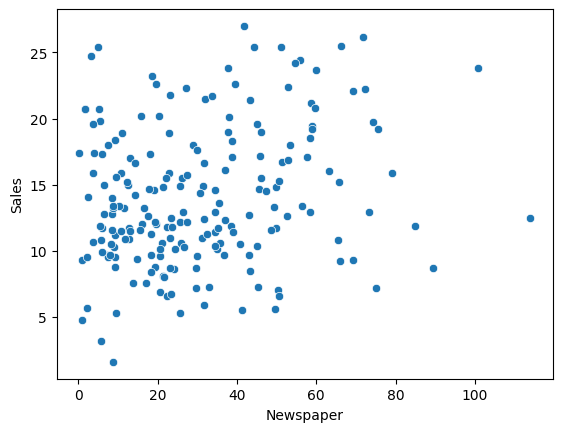

In [ ]:
sns.scatterplot(data=df,x='Newspaper',y='Sales')
plt.show()

The range of each attribute differs from one another. Hence, there is a need to normalize the data to prevent data leakage and to improve the performance of the algorithm. Before that, Split the data into two sets:training set and testing set.

In [ ]:
X=df.drop(columns='Sales',axis=1)
Y=df['Sales']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=123)

Scale the features : Normalizing

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

Fit the model

In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

Building the model on top of the training set


In [ ]:
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
c=lr.intercept_
m=lr.coef_
print(f'Intercept:{c} \nCoefficients:{m}')

Intercept:14.095000000000002 
Coefficients:[ 3.90372233  2.7816998  -0.01399175]


Now, predict the values on top of this model for the testing set

In [ ]:
y_pred_test=lr.predict(x_test)
y_pred_test

array([12.5893486 ,  6.57466309, 15.51569107,  9.76164334, 14.08560255,
       20.17829056, 12.32800513, 19.82963814, 14.87331552, 10.31222767,
       10.12322859, 20.67028922,  6.53084946,  6.01905104,  3.57991965,
       11.29258057, 13.14446753, 15.95278361,  7.79731662, 18.014187  ,
        7.55638624, 11.66008132, 10.74032853,  7.35587039, 22.10561982,
       10.2894642 , 10.54321563, 14.89639115, 10.0460676 , 20.54318186,
        9.63429763, 21.12541362, 24.01131416,  6.77913882, 15.12282694,
       19.16513974, 18.44896906, 19.54139302, 16.23003217,  9.43340198])

Find the root mean square error

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score
import math
rmse1= math.sqrt(mean_squared_error(y_test, y_pred_test))

print("Root-mean squared error over the model: ",rmse1)
print("R2 score is:",r2_score(y_pred_test,y_test))

Root-mean squared error over the model:  1.4842550249545563
R2 score is: 0.9186533065791052


0.91 is quite good R2 score